In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
ratings_path = r"C:\Projects\Recomender System\data\raw\ratings.csv"
movies_path = r"C:\Projects\Recomender System\data\raw\movies.csv"
df_ratings = pd.read_csv(ratings_path)
df_movies = pd.read_csv(movies_path)
df_ratings.head(), df_movies.head()

(   userId  movieId  rating   timestamp
 0       1      296     5.0  1147880044
 1       1      306     3.5  1147868817
 2       1      307     5.0  1147868828
 3       1      665     5.0  1147878820
 4       1      899     3.5  1147868510,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

In [11]:
df_ratings.info(), df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


(None, None)

In [12]:
print("Missing in ratings:\n", df_ratings.isna().sum())
print("\nMissing in movies:\n", df_movies.isna().sum())

Missing in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing in movies:
 movieId    0
title      0
genres     0
dtype: int64


In [13]:
df_ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

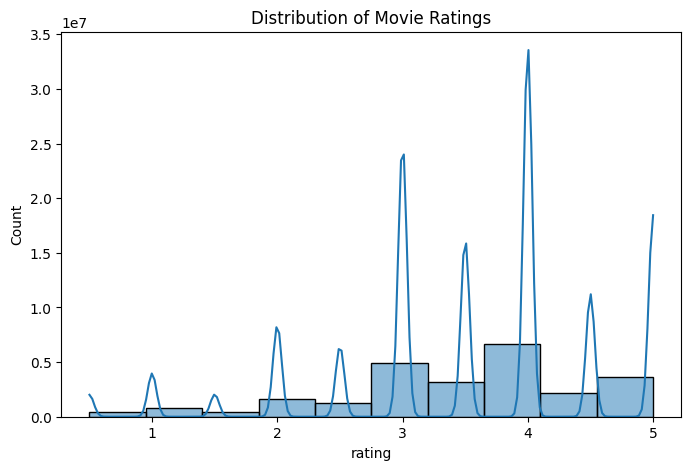

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df_ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()

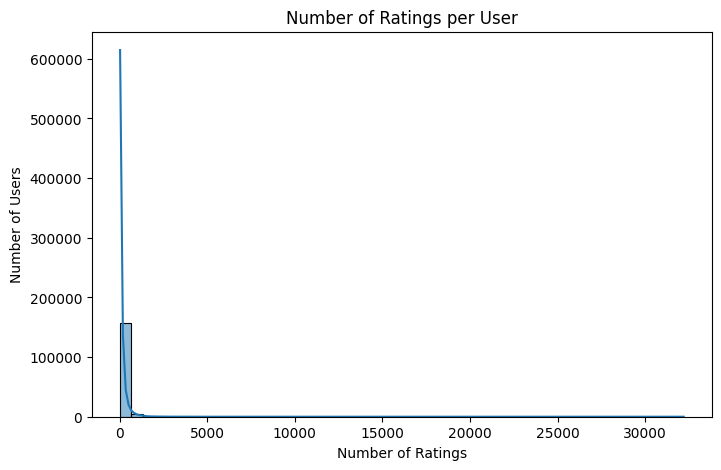

In [15]:
ratings_per_user = df_ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(8,5))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

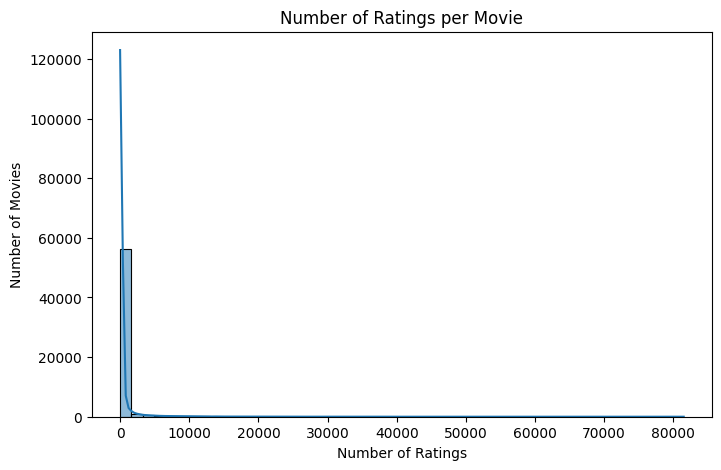

In [16]:
ratings_per_movie = df_ratings.groupby('movieId')['rating'].count()
plt.figure(figsize=(8,5))
sns.histplot(ratings_per_movie, bins=50, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

C:\Users\Innolab\AppData\Local\Temp\ipykernel_4960\1539928156.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='genre', y='count', palette='viridis')


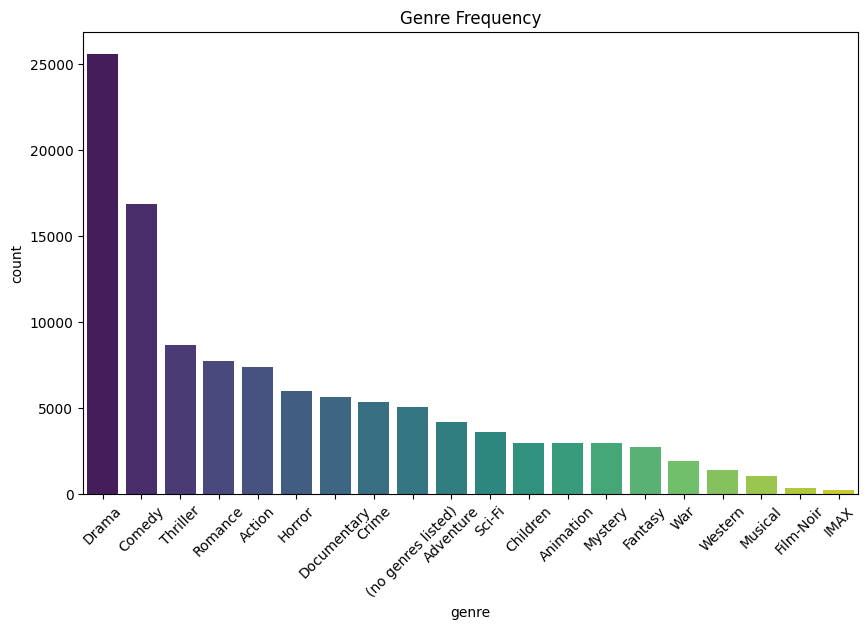

In [17]:
df_movies['genre_list'] = df_movies['genres'].str.split('|')

from collections import Counter
genre_counts = Counter()

for genres in df_movies['genre_list']:
    genre_counts.update(genres)
    
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).reset_index()
genre_df.columns = ['genre', 'count']
genre_df = genre_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='genre', y='count', palette='viridis')
plt.title('Genre Frequency')
plt.xticks(rotation=45)
plt.show()

In [19]:
df = df_ratings.merge(df_movies[['movieId','title','genres']], on='movieId', how='left')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance


In [20]:
df.to_parquet(r"C:\Projects\Recomender System\data\processed\ratings_movies.parquet", index=False)